In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../")

In [21]:
def State_value_function(ph,gamma=1,theta=0.0001):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    N=100
    r = np.zeros(N+1)
    r[N] = 1 
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    
    #V0 = np.zeros(N+1)
    V = np.zeros(N+1)
    S = range(1, N) # Stakes set. Your minimum bet is 1, maximum bet is min(s, N-s).
    policy = np.ones(N+1)
    policy[0]=0
    policy[N]=0
   
    while True:
            for s in S:
                V[s]=ph*(r[s+int(policy[s])]+V[s+int(policy[s])]*gamma)+(1-ph)*(r[s-int(policy[s])]+V[s-int(policy[s])]*gamma)
            #print("V= ", V)
            # Stopping condition
            delta = 0
            # Update each state...
            for s in S:
                v = np.max(V)
                # Calculate delta across all states seen so far
                delta = max(delta, np.abs(v - V[s]))
                # Update the value function. Ref: Sutton book eq. 4.10. 
                V[s] = v        
            # Check if we can stop 
            if delta < theta:
                break
            #print("V= ", V)        
            policy_stable=True
            for s in S:
                old_action=policy[s]
                policy[s]=np.argmax(V)
                if old_action!= policy[s]:
                    policy_stable=False
            if policy_stable:
                break
            else:
                continue                  
    return policy, V

In [22]:
policy, v = State_value_function(ph=0.4,gamma=1,theta=0.0001)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0.]

Optimized Value Function:
[0.  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0. ]



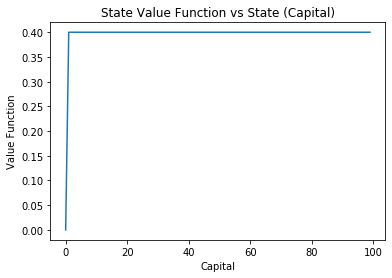

In [32]:
#Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Function')
 
# giving a title to the graph
plt.title('State Value Function vs State (Capital)')
 
# function to show the plot
plt.show()

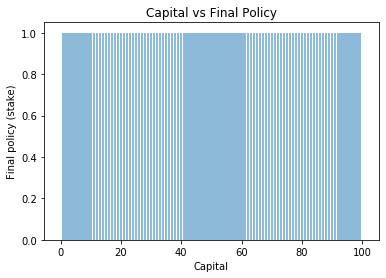

In [31]:
# Plotting Capital vs Final Policy

# x axis values
x = range(101)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5) 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()